# <font color='#197D75'> MD005 - Regresion </font>

Para la realizacion de este practico volveremos a utilizar la NBA, pero esta vez la tomamos de https://www.kaggle.com/code/mattop/nba-draft-player-data-analysis-1989-2021/input. El objetivo es realizar regresiones para determinar las variables que nos pueden ayudar a predecir los puntos de cada jugador de la liga. Como primer paso a cualquier estimacion que querramos hacer debemos entender que hay que hacer un profundo analisis del dominio, calculando estadisticos, observando distribuciones, evaluando nulos y outsiders, y realizando graficos que nos ayuden a comrpender mejor nuestra base de datos. En este trabajo practico es importante remarcar que correlacion no implica causalidad, con lo cual evaluaremos con precision las variables que puedan llegar a tener algun tipo de informacion util para estimar nuestro objetivo. Es decir, este estudio no va a demostrar ningun tipo de causalidad, unicamente nos concentraremos en las relaciones lineal o no lineales, pero de ninguna manera concluiremos que son determinantes dado que no queremos caer en errores como estos:

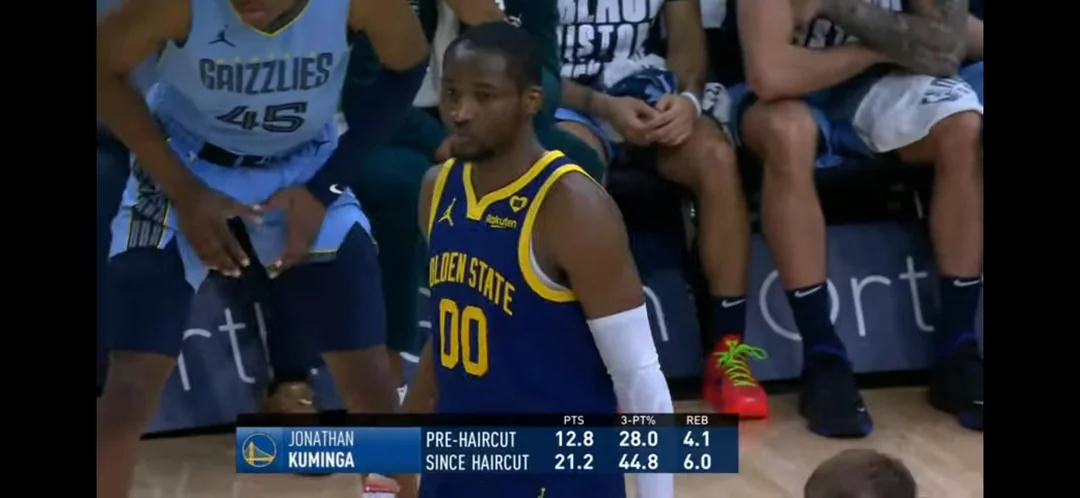

In [100]:
# Importación de librerías para manipulación y visualización de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import mutual_info_classif
from matplotlib.colors import LinearSegmentedColormap

In [101]:
# Especifica la ruta del archivo CSV
ruta_archivo = "C:/Users/Mateo/Documents/Mateo/Data Science - La Salle/MD005 - Sistemas basados en el conocimiento/TP4 - Regresion/nbaplayersdraft.csv"

# Lee el archivo CSV y almacena los datos en un DataFrame de pandas
datos = pd.read_csv(ruta_archivo, sep=";")
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1922 non-null   int64  
 1   year                       1922 non-null   int64  
 2   rank                       1922 non-null   int64  
 3   overall_pick               1922 non-null   int64  
 4   team                       1922 non-null   object 
 5   player                     1922 non-null   object 
 6   college                    1585 non-null   object 
 7   years_active               1669 non-null   float64
 8   games                      1669 non-null   float64
 9   minutes_played             1669 non-null   float64
 10  points                     1669 non-null   float64
 11  total_rebounds             1669 non-null   float64
 12  assists                    1669 non-null   float64
 13  field_goal_percentage      1665 non-null   float

In [102]:
datos.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


1. **<font color='#197D75'> id: </font>** Identificación única para cada entrada en el conjunto de datos.
2. **<font color='#197D75'> year: </font>** Año correspondiente a la entrada deljugador a la NBA..
3. **<font color='#197D75'> rank: </font>** Clasificación asociada al jugador en el año especificado.
4. **<font color='#197D75'> overall_pick: </font>** Selección general del jugador en el draft.
5. **<font color='#197D75'> team: </font>** Equipo al que pertenece el jugador.
6. **<font color='#197D75'> player: </font>** Nombre del jugador.
7. **<font color='#197D75'> college: </font>** Institución educativa a la que asistió el jugador.
8. **<font color='#197D75'> years_active: </font>** Número de años en los que el jugador estuvo activo.
9. **<font color='#197D75'> games: </font>** Número total de juegos jugados por el jugador.
10. **<font color='#197D75'> minutes_played: </font>** Total de minutos jugados por el jugador.
11. **<font color='#197D75'> points: </font>** Total de puntos anotados por el jugador.
12. **<font color='#197D75'> total_rebounds: </font>** Total de rebotes obtenidos por el jugador.
13. **<font color='#197D75'> assists: </font>** Total de asistencias proporcionadas por el jugador.
14. **<font color='#197D75'> field_goal_percentage: </font>** Porcentaje de aciertos en tiros de campo.
15. **<font color='#197D75'> 3_point_percentage: </font>** Porcentaje de aciertos en tiros de tres puntos.
16. **<font color='#197D75'> free_throw_percentage: </font>** Porcentaje de aciertos en tiros libres.
17. **<font color='#197D75'> average_minutes_played: </font>** Promedio de minutos jugados por juego.
18. **<font color='#197D75'> points_per_game: </font>** Promedio de puntos anotados por juego.
19. **<font color='#197D75'> average_total_rebounds: </font>** Promedio de rebotes por juego.
20. **<font color='#197D75'> average_assists: </font>** Promedio de asistencias por juego.
21. **<font color='#197D75'> win_shares: </font>** Medida estadística que cuantifica la contribución de un jugador a las victorias del equipo.
22. **<font color='#197D75'> win_shares_per_48_minutes: </font>** Medida ajustada que estima la cantidad de victorias que un jugador contribuiría por cada 48 minutos jugados.
23. **<font color='#197D75'> box_plus_minus: </font>** Estimación de la contribución global de un jugador por cada 100 posesiones.
24. **<font color='#197D75'> value_over_replacement: </font>** Estimación de la contribución de un jugador por encima de un jugador 
####
Vamos a revisar como son sus distribuciones, si presenta nulos y si tiene outsiders cada una de nuestras variables:de reemplazo promedio.


In [103]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1922 non-null   int64  
 1   year                       1922 non-null   int64  
 2   rank                       1922 non-null   int64  
 3   overall_pick               1922 non-null   int64  
 4   team                       1922 non-null   object 
 5   player                     1922 non-null   object 
 6   college                    1585 non-null   object 
 7   years_active               1669 non-null   float64
 8   games                      1669 non-null   float64
 9   minutes_played             1669 non-null   float64
 10  points                     1669 non-null   float64
 11  total_rebounds             1669 non-null   float64
 12  assists                    1669 non-null   float64
 13  field_goal_percentage      1665 non-null   float

A esta altura ya ganamos mucho conocimiento respecto al dominio en el cual estamos trabajando, con lo cual debemos ajustar nuestra nueva base de datos a las conclusiones sacadas en los trabajos anteriores. En primer lugar, remarcamos la evolucion del estilo de juego en los ultimos anios de la NBA, esto nos hizo poner el foco en observar los datos para las ultimas temporadas de la liga, ya que el juego ha cambiado y de nada sirve ensuciar nuestras estadisticas con datos que no aportan informacion relevante. En segundo lugar, si queremos utilizar las variables de puntos, rebotes y asistencias, debemos ajustar las mismas por cantidad de minutos jugados, con lo cual debemos calcular estas variables:

Calcularemos primero a traves de las variables year y year_active los jugadores que han estado activos en desde 2017 hasta la actualidad:

In [104]:
datos['activo'] = datos['years_active'] + datos['year']
datos = datos[datos['activo'] >= 2017]

Una vez que nos hemos quedado con nuestra base de datos con jugadores activos desde 2017, pasaremos a ajustar las metricas que fuimos mencionando en los trabajos anteriores:

In [105]:
datos['PTS_MIN'] = datos['points'] / datos['minutes_played']
datos['REB_MIN'] = datos['total_rebounds'] / datos['minutes_played']
datos['AST_MIN'] = datos['assists'] / datos['minutes_played']

In [106]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 501 to 1921
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         678 non-null    int64  
 1   year                       678 non-null    int64  
 2   rank                       678 non-null    int64  
 3   overall_pick               678 non-null    int64  
 4   team                       678 non-null    object 
 5   player                     678 non-null    object 
 6   college                    563 non-null    object 
 7   years_active               678 non-null    float64
 8   games                      678 non-null    float64
 9   minutes_played             678 non-null    float64
 10  points                     678 non-null    float64
 11  total_rebounds             678 non-null    float64
 12  assists                    678 non-null    float64
 13  field_goal_percentage      677 non-null    float64
 

No ha quedado una base de datos con 678 observaciones. Limpiaremos nuestro data set de las observaciones nulas, ya que a priori no representan un gran porcentaje sobre el total. La variable college al tener mas cantidad de valores nulos y no ser relevante para el estudio que queremos realizar, la vamos a quitar del data set:

In [107]:
datos = datos.drop('college', axis=1)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 501 to 1921
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         678 non-null    int64  
 1   year                       678 non-null    int64  
 2   rank                       678 non-null    int64  
 3   overall_pick               678 non-null    int64  
 4   team                       678 non-null    object 
 5   player                     678 non-null    object 
 6   years_active               678 non-null    float64
 7   games                      678 non-null    float64
 8   minutes_played             678 non-null    float64
 9   points                     678 non-null    float64
 10  total_rebounds             678 non-null    float64
 11  assists                    678 non-null    float64
 12  field_goal_percentage      677 non-null    float64
 13  3_point_percentage         662 non-null    float64
 

Arranquemos a focalizar nuestra base de datos en aquellas variables que en principio seran de interes para determinar los puntos por minutos jugados. En principio me gustaria evaluar:

1. **<font color='#197D75'> id </font>**
2. **<font color='#197D75'> year </font>**
3. **<font color='#197D75'> overall_pick </font>**
4. **<font color='#197D75'> years_active </font>**
5. **<font color='#197D75'> games </font>**
6. **<font color='#197D75'> minutes_played </font>**
7. **<font color='#197D75'> points </font>**
8. **<font color='#197D75'> total_rebounds </font>**
9. **<font color='#197D75'> assists </font>**
10. **<font color='#197D75'> field_goal_percentage </font>**
11. **<font color='#197D75'> 3_point_percentage </font>**
12. **<font color='#197D75'> free_throw_percentage </font>**
13. **<font color='#197D75'> PTS_MIN </font>**
14. **<font color='#197D75'> REB_MIN </font>**
15. **<font color='#197D75'> AST_MIN </font>**

Seleccionamos 15 variables que interpretamos que podrian ser utiles. Para ello armaremos un subset de nuestra base de datos:

In [108]:
columnas_seleccionadas = ['year', 'overall_pick', 'years_active', 'games', 'minutes_played',
                           'points', 'total_rebounds', 'assists', 'field_goal_percentage',
                           '3_point_percentage', 'free_throw_percentage', 'PTS_MIN', 'REB_MIN', 'AST_MIN']
subset = datos[columnas_seleccionadas]
subset = subset.dropna()
subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, 501 to 1921
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   654 non-null    int64  
 1   overall_pick           654 non-null    int64  
 2   years_active           654 non-null    float64
 3   games                  654 non-null    float64
 4   minutes_played         654 non-null    float64
 5   points                 654 non-null    float64
 6   total_rebounds         654 non-null    float64
 7   assists                654 non-null    float64
 8   field_goal_percentage  654 non-null    float64
 9   3_point_percentage     654 non-null    float64
 10  free_throw_percentage  654 non-null    float64
 11  PTS_MIN                654 non-null    float64
 12  REB_MIN                654 non-null    float64
 13  AST_MIN                654 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 76.6 KB


Nuestra base de datos a quedado ajustada a un total de 654 variables, sin valores nulos. Ahora pasemos a visualizar algunas estadisticas y graficas:

In [109]:
subset.describe()

,year,overall_pick,years_active,games,minutes_played,points,total_rebounds,assists,field_goal_percentage,3_point_percentage,free_throw_percentage,PTS_MIN,REB_MIN,AST_MIN
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,2014.114679,24.206422,6.555046,379.923547,9597.044343,4369.599388,1737.100917,948.136086,0.450657,0.309818,0.744300,0.412551,0.182041,0.086683
std,5.261376,16.175205,4.619275,324.815656,9892.896189,5191.150846,2067.533076,1369.025536,0.069744,0.093353,0.100408,0.104909,0.076952,0.049588
min,1998.000000,1.000000,1.000000,4.000000,25.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.240000,0.040000,0.065750,0.000000
25%,2011.000000,10.000000,3.000000,107.250000,1787.000000,660.000000,284.000000,115.750000,0.415000,0.292000,0.696250,0.341413,0.119375,0.050899
50%,2015.000000,22.000000,5.000000,283.000000,6030.000000,2461.000000,1011.500000,437.500000,0.444000,0.334000,0.759000,0.401184,0.162842,0.071089
75%,2018.000000,37.000000,10.000000,610.750000,15199.500000,6298.250000,2383.750000,1194.250000,0.478000,0.363000,0.813000,0.474657,0.230757,0.112996
max,2021.000000,60.000000,22.000000,1541.000000,52139.000000,37062.000000,14627.000000,10977.000000,0.728000,0.667000,1.000000,0.833496,0.500000,0.275140


Realizamos un analisis de los estadisticos basicos de nuestras variables. En primer lugar nos aseguramos no tener datos nulos en nuestra base de datos, todas nuestras variables poseen 654 observaciones. Realizaremos visualizaciones de histogramas, grafico de radar para visualizar la media general de cada variable de interes, y boxplots para observar valores atipicos en cada distribucion.

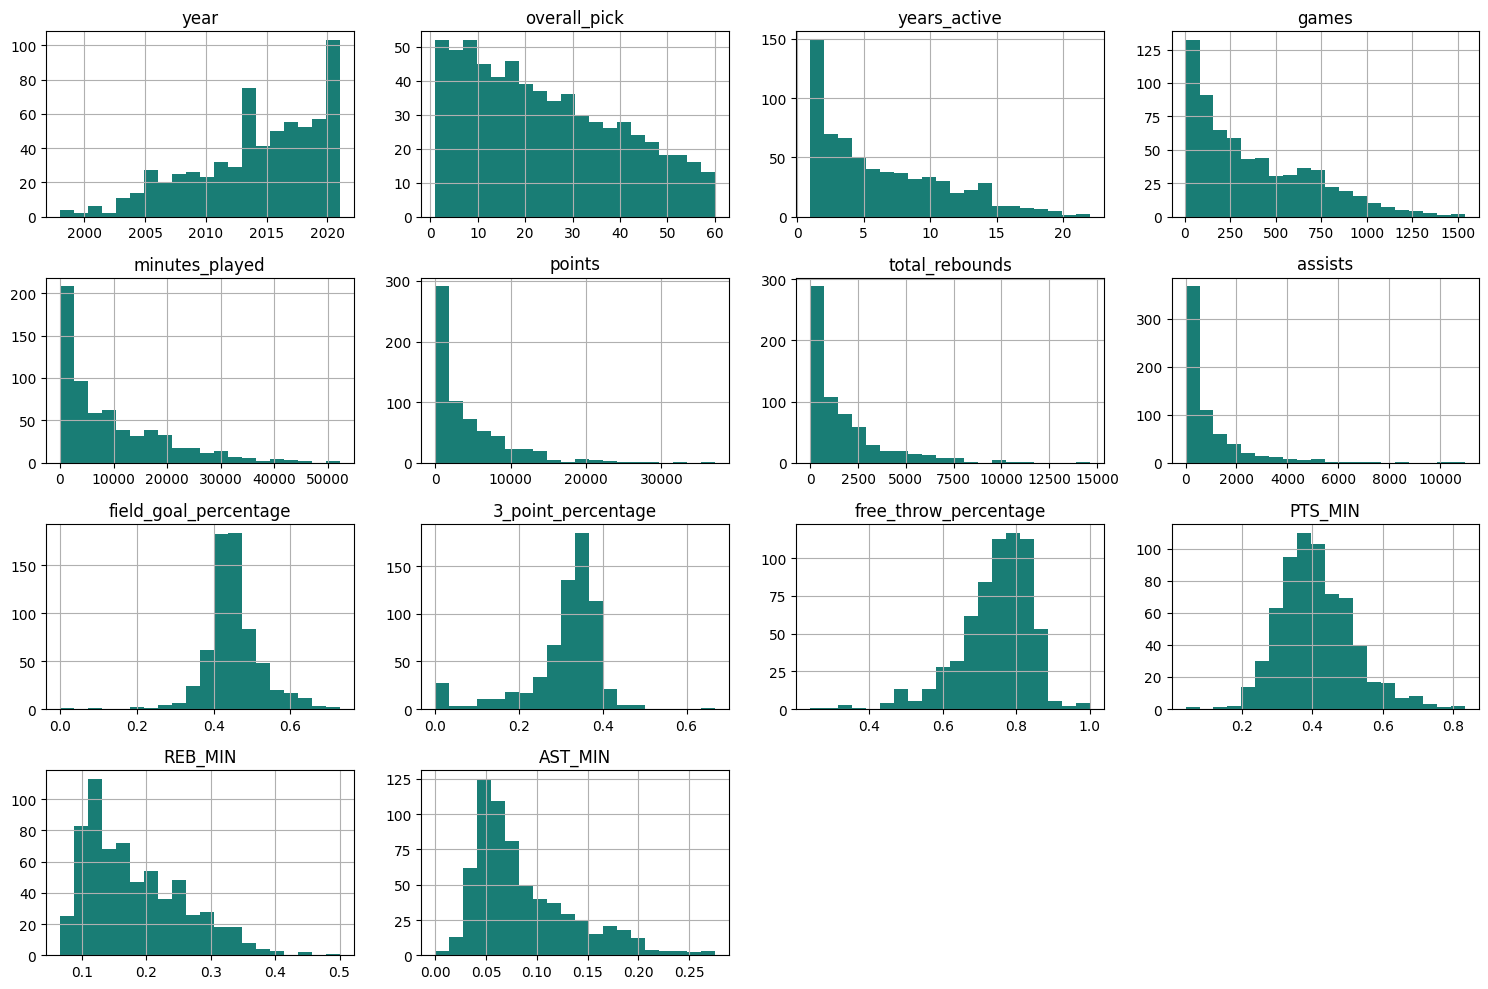

In [110]:
subset.hist(bins=20, figsize=(15, 10), color='#197D75')
plt.tight_layout()
plt.show()

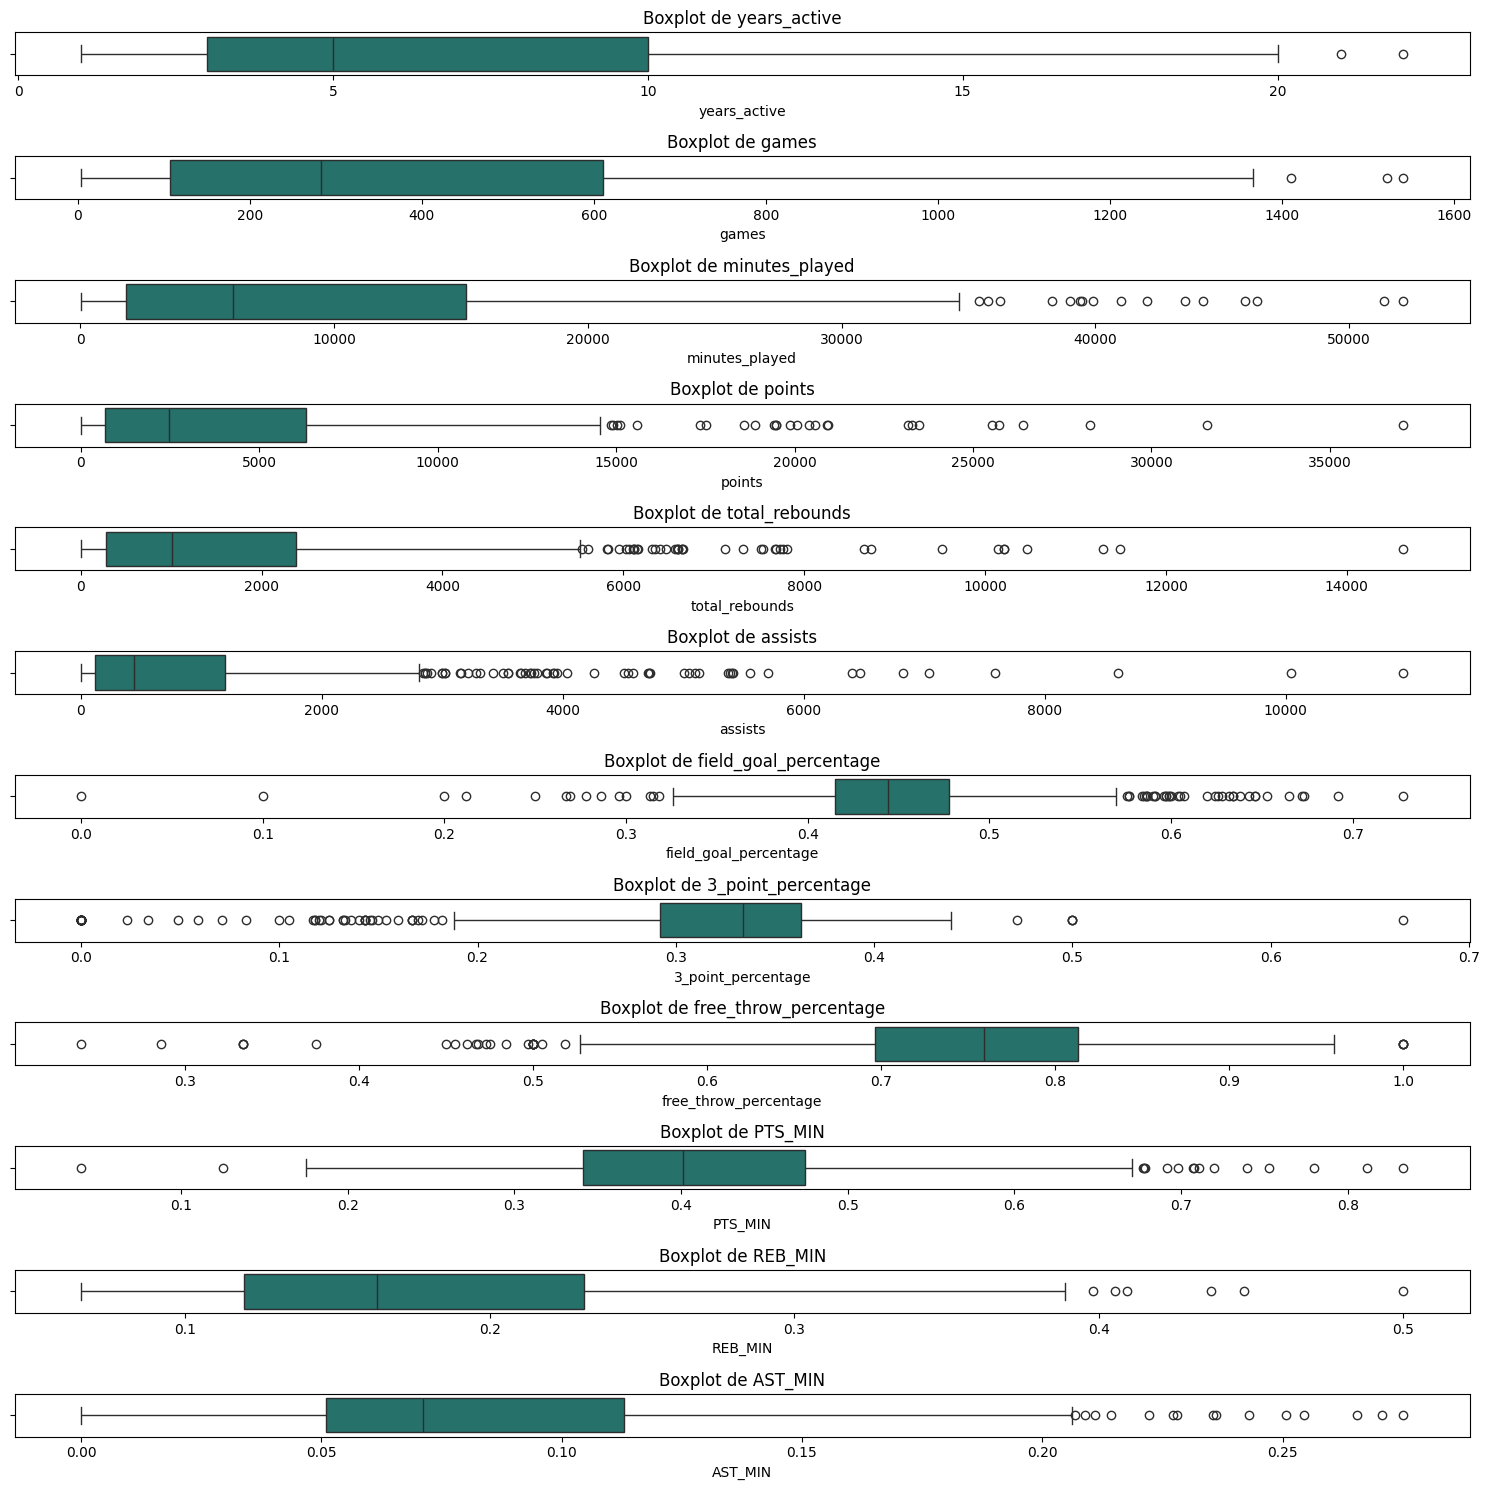

In [111]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(15, 15))

variables_interes = subset.select_dtypes(include='float').columns.tolist()

# Crear boxplots para cada variable en el subset con color personalizado
for i, variable in enumerate(variables_interes, start=1):
    plt.subplot(len(variables_interes), 1, i)
    sns.boxplot(x=subset[variable], color='#197D75')
    plt.title(f'Boxplot de {variable}')
    plt.xlabel(variable)

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Las distribuciones parecen bastante logicas respecto a lo que deberia ser cada metrica. Van totalmente en linea con las que obtuvimos en los practicos anteriores. 

Vemos que hay observaciones que se van por fuera de los cuartiles. Sin embargo, esto puede darse por jugadores que hayan jugado muy pocos minutos y que hayan participado de exitosamente o no existosamente en su corta participacion. Esta deduccion la podemos ver en que al ajustar los puntos, rebotes y asistencias por minutos de juego, los valores atipicos disminuyen mucho. Veamos un poco mas de cerca que sucede con esta situacion y nuestra variable PTS_MIN. Pasemos a analizar un poco mejor nuestra variable objetivo:

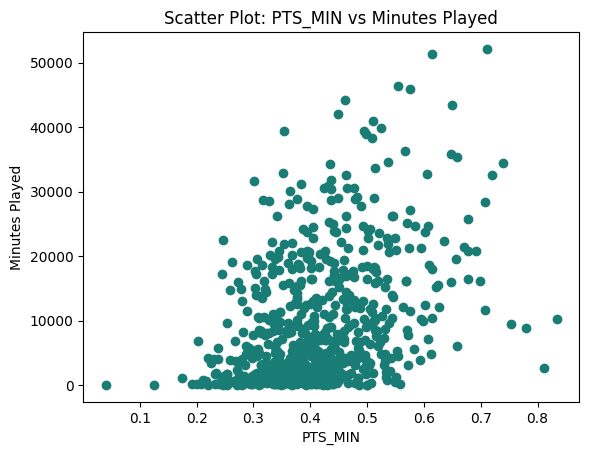

In [112]:
plt.scatter(subset['PTS_MIN'], subset['minutes_played'], color='#197D75')
plt.xlabel('PTS_MIN')
plt.ylabel('Minutes Played')
plt.title('Scatter Plot: PTS_MIN vs Minutes Played')
plt.show()

Tal como dijimos, podemos ver que nuestros outsiders pueden corresponderse a que hay jugadores en nuestro data set que tienen cero minutos jugados (quizas porque literalmente no hayan jugado mas que eso en su carrera), pero que hayan hecho alguna intervencio existosa en el partido aportando puntos, asistencias y/o rebotes para su equipo. Agreguemos una distincion por cantidad de puntos:

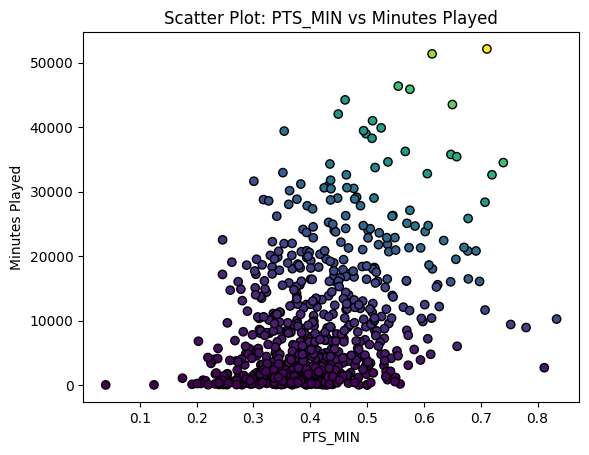

In [113]:
plt.scatter(subset['PTS_MIN'], subset['minutes_played'], c=subset['points'], cmap='viridis', edgecolors='black')
plt.xlabel('PTS_MIN')
plt.ylabel('Minutes Played')
plt.title('Scatter Plot: PTS_MIN vs Minutes Played')
plt.show()

Aca confirmamos nuestra sospecha. Como nosotros queremos evaluar los factores que determinan la cantidad de puntos que hace un jugador por minuto jugado, tendremos en cuenta este sesgo a la hora de analizar los resultados. Pasemos a ver como son las relaciones lineales de todas las variables de nuestro data set respecto a nuestra variable objetivo PTS_MIN:

In [114]:
# Calcular las correlaciones
correlations = subset.corr()['PTS_MIN']

# Crear un DataFrame con las correlaciones
correlation_df = pd.DataFrame({'Variable': correlations.index, 'Correlation with PTS_MIN': correlations.values})

# Mostrar el DataFrame con las correlaciones
print(correlation_df)

                 Variable  Correlation with PTS_MIN
0                    year                 -0.141586
1            overall_pick                 -0.349448
2            years_active                  0.248311
3                   games                  0.297943
4          minutes_played                  0.395968
5                  points                  0.556581
6          total_rebounds                  0.341546
7                 assists                  0.416924
8   field_goal_percentage                  0.263668
9      3_point_percentage                  0.259954
10  free_throw_percentage                  0.336048
11                PTS_MIN                  1.000000
12                REB_MIN                  0.046802
13                AST_MIN                  0.319330


Del analisis de correlacion podemos extraer algunas conclusiones. La primera de ellas es que es de esperar que los puntos y minutos jugados tengan una correlacion "alta" con nuestra variable objetivo. La segunda observacion es que aparentemente la que mayor correlacion lineal presenta con nuestra variable objetivo es la cantidad de asistencias. Sin embargo, no queremos mirar unicamente las correlaciones lineales por separado, dado que estamos intentando armar un modelo de regresion lineal que sea capaz de explicar en conjunto esta variable objetivo. Entonces pasemos a calcular las correlaciones que hay entre las variables:

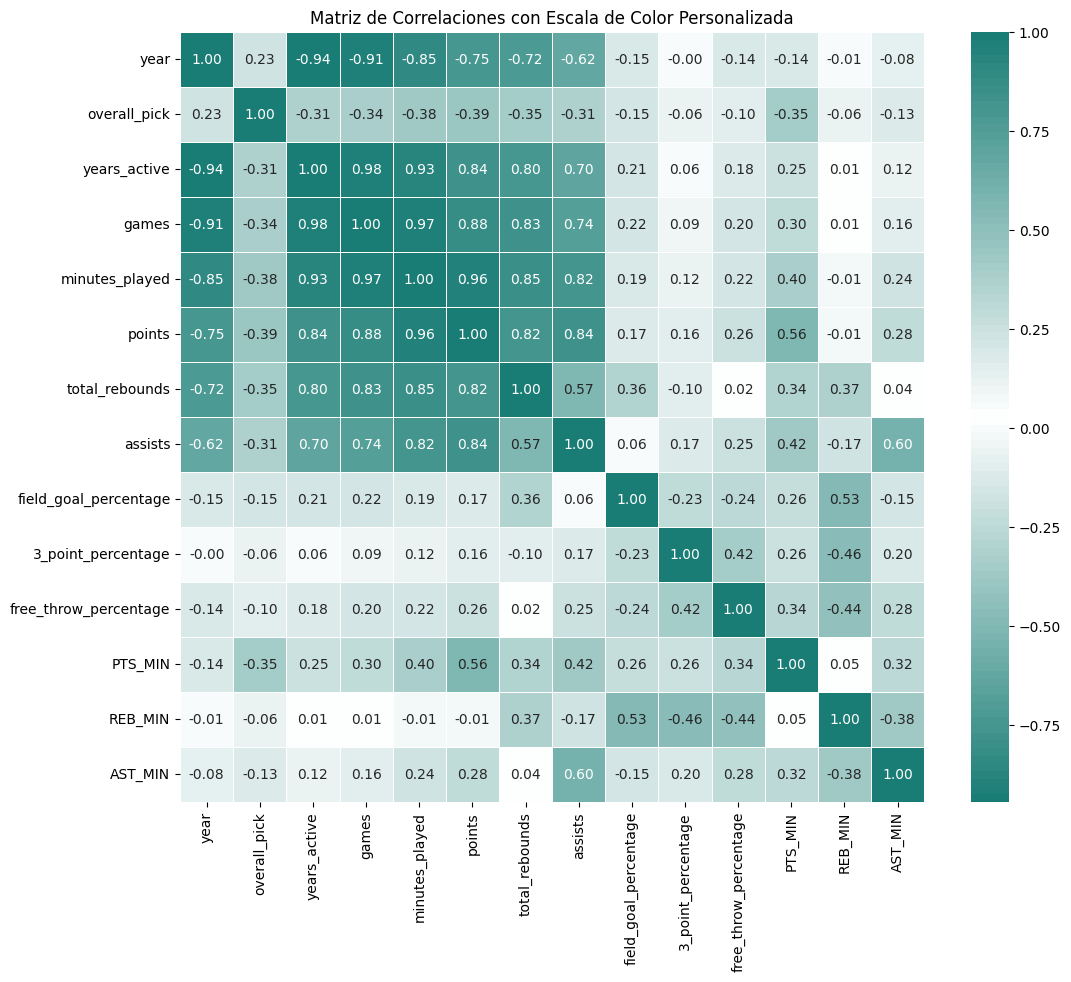

In [115]:
color1 = '#197D75'
color2 = '#FFFFFF'
color3 = '#197D75'
cmap_colors = [color1, color2, color3]
n_bins = 100 
cmap_name = 'custom_color_map'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, cmap_colors, N=n_bins)

# Calcular la matriz de correlaciones
correlation_matrix = subset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlaciones con Escala de Color Personalizada')
plt.show()

Concluimos que nuestro dominio se encuentra dentro de los valores esperados previamente. Ahora pasaremos a realizar las estimaciones pertinentes al ejercicio:

## <font color='#197D75'> Regresion lineal </font>

Dado nuestro analisis de dominio, queremos plantear una regresion lineal para visualizar la relacion que existe entre los anios de experiencia de un jugador y su rendimiento en términos de puntos anotados.l. La regresión lineal nos permitirá modelar la dependencia entre dos variables específicas: el número de años de experiencia (years_active) y la cantidad total de puntos anotados por un jugad. Esperamos quehaya mejorasanotacion.

### <font color='#197D75'> Regresion lineal univariante </font>

In [116]:
columnas_seleccionadas = ['years_active', 'points']
subset2 = subset[columnas_seleccionadas]

In [117]:
# Vamos a seleccionar las variables, tanto las X como las Y con una única variable independiente
X = subset2[['years_active']]
y = subset2['points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

# Algoritmo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicción y evaluación
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 6152112.800291287
R-squared: 0.7083645007818682


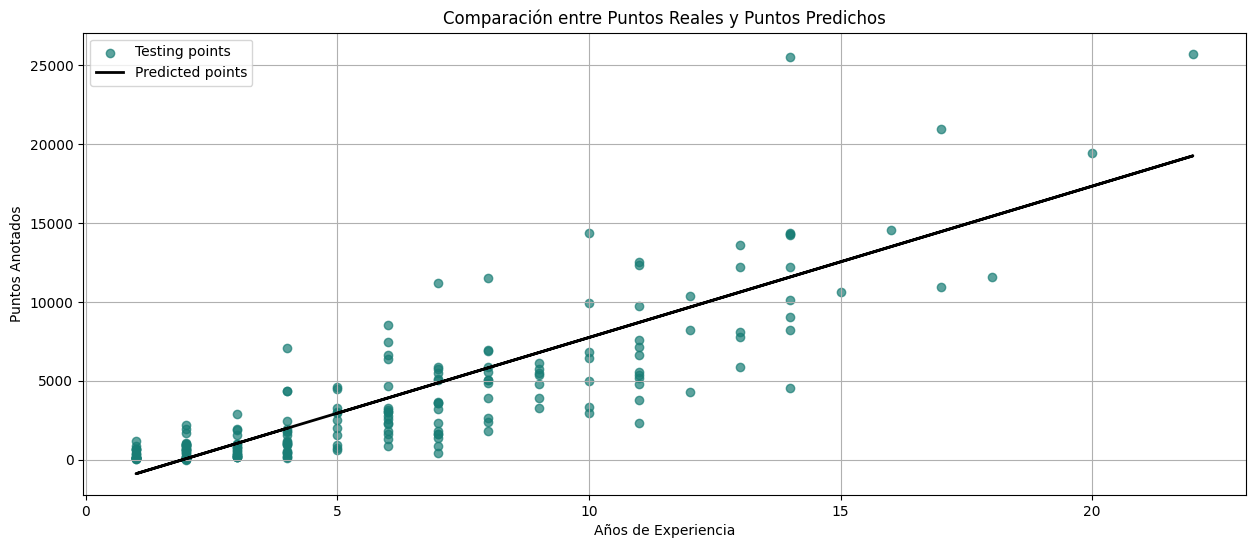

In [118]:
plt.figure(figsize=(15, 6))
plt.scatter(X_test, y_test, label="Testing points", color='#197D75', alpha=0.7)  # Agregué alpha para transparencia
plt.plot(X_test, y_pred, label="Predicted points", color='black', linewidth=2)  # Añadí un ancho de línea para mayor visibilidad
plt.title("Comparación entre Puntos Reales y Puntos Predichos")
plt.xlabel("Años de Experiencia")
plt.ylabel("Puntos Anotados")
plt.legend()
plt.grid(True)
plt.show()

In [119]:
columnas_seleccionadas = ['minutes_played', 'points']
subset3 = subset[columnas_seleccionadas]

In [120]:
# Vamos a seleccionar las variables, tanto las X como las Y con una única variable independiente
X = subset3[['minutes_played']]
y = subset3['points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

# Algoritmo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicción y evaluación
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 1813659.8335277713
R-squared: 0.9140250499084311


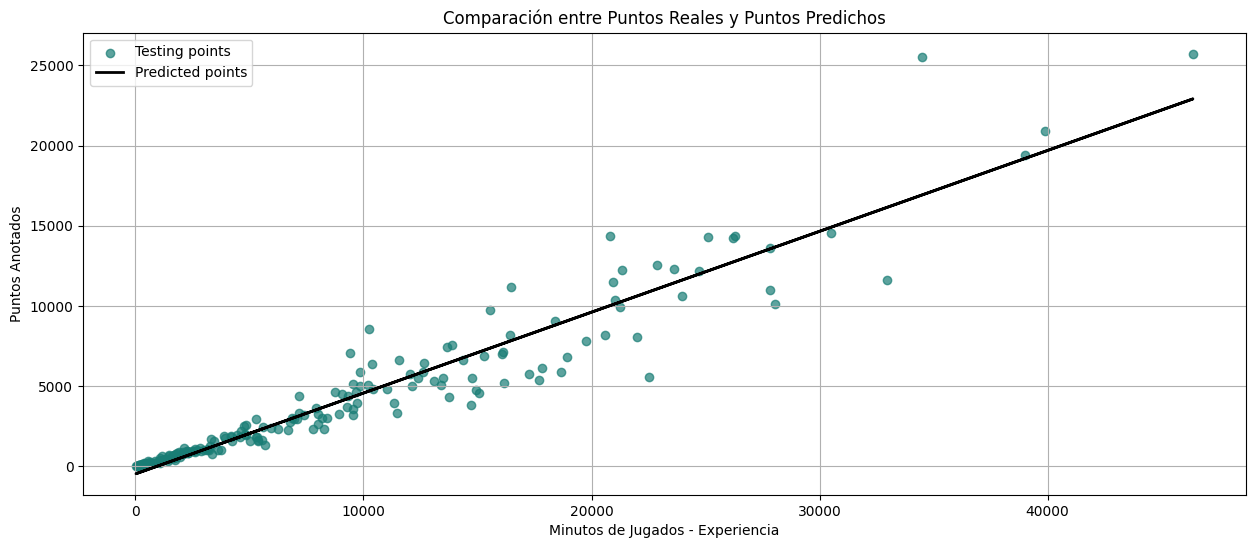

In [121]:
plt.figure(figsize=(15, 6))
plt.scatter(X_test, y_test, label="Testing points", color='#197D75', alpha=0.7)  # Agregué alpha para transparencia
plt.plot(X_test, y_pred, label="Predicted points", color='black', linewidth=2)  # Añadí un ancho de línea para mayor visibilidad
plt.title("Comparación entre Puntos Reales y Puntos Predichos")
plt.xlabel("Minutos de Jugados - Experiencia")
plt.ylabel("Puntos Anotados")
plt.legend()
plt.grid(True)
plt.show()

En estos dos modelos de regresiones lineales vemos como es mucho mas deterministico para un jugador acumular minutos jugados que anios de experiencia a la hora de analizar la cantidad de puntos que realizo. Esto se debe claramente a la posibilidad de entrar en juego que tiene el jugador, aumentando las probabilidades de manera significativa de marcar puntos. Si queremos evaluar a un jugador, esto nos puede indicar que no debemos guiarnos por la cantidad de anios de experiencia que tiene el jugador, sino por la cantidad de puntos por minutos jugados que presenta el mismo. El primer modelo tiene un R2 de 0,7 (70% de explicabilidad). El segundo modelo tiene un R2 mucho mas grande, de 0,91 (91% de explicabilidad). Adenas, en el segundo modelo, el error medio cuadrado es significativamente menor. Sin embargo, tambien en el segundo modelo vemos como los puntos aumentan el rango a medida que van aumentando los minutos de experiencia, esto se debe a que claramente no todos los jugadores son capaces de mantener constantes su promedio de puntos por minuto a lo largo de toda su carrera. Aqui es donde justificamos el estudio inicial de la relacion entre puntos, minutos y puntos por minutos. Es muy probable, que a mayores minutos jugados el jugador empiece a tender a lo que seria realmente su rendimiento en la NBA. Sin embargo, con bajos minutos de juego, estas metricas podrian estar distorsionadas. Posiblemente, este modelo pueda llegar a ajustarse mejor utilizando una regresion polinomica, y asi aumentando nuestra capacidad explicativa y disminuyendo el error medio cuadrado. Veamos:

## <font color='#197D75'> Regresion polinomica </font>

La regresion polinomica permite modelar curvas mas complejas al introducir terminos polinomicos de mayor orden en la ecuacion de regresion. Con lo cual, podemos considerar ajustar el modelo de regresion lineal a un modelo polinomico para evaluar si es capaz de capturar mejor la variacion en la relacion entre puntos y minutos jugados a lo largo de la carrera de un jugador.

In [122]:
X = subset3[['minutes_played']]
y = subset3['points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

# La regresión polinómica sigue manteniendo una relación 'lineal' por ello definimos un polinomio
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Con los datos preparados para un polinomio, añadimos el entrenamiento para la regresión
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

#Predicciones
y_pred = poly_model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 1669599.8684244466
R-squared: 0.9208540859167218


In [123]:
new_x = np.arange(1, 45000).reshape(-1, 1)
new_x2 = poly.fit_transform(new_x)

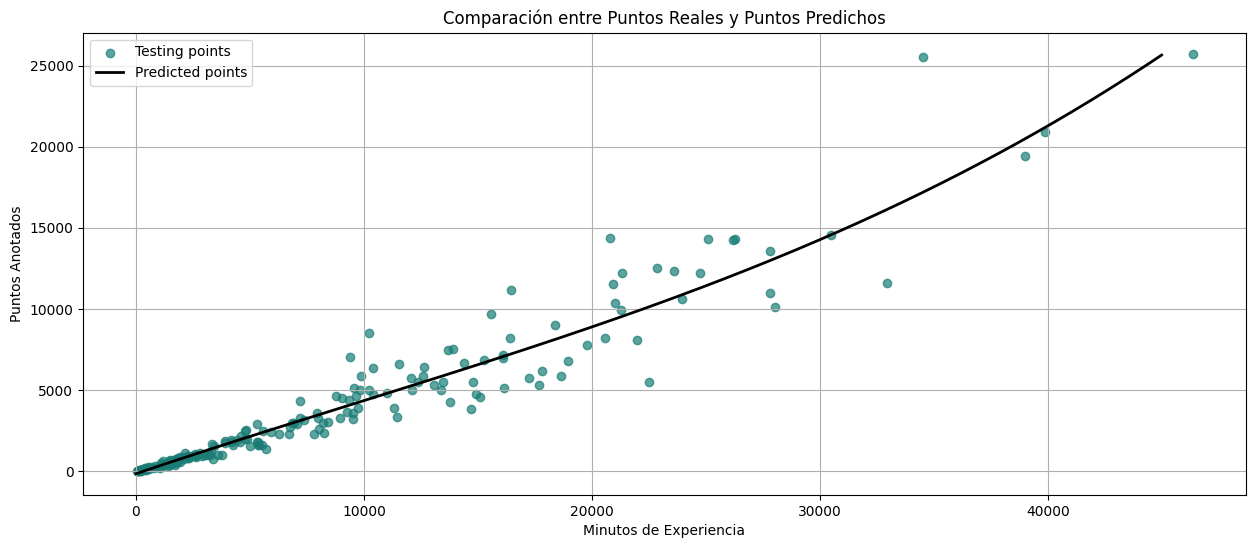

In [124]:
# Generar predicciones para los nuevos datos
pred = poly_model.predict(new_x2)

# Graficar puntos reales y predicciones
plt.figure(figsize=(15, 6))
plt.scatter(X_test, y_test, label="Testing points", color='#197D75', alpha=0.7)
plt.plot(new_x, pred, label="Predicted points", color='black', linewidth=2)
plt.title("Comparación entre Puntos Reales y Puntos Predichos")
plt.xlabel("Minutos de Experiencia")
plt.ylabel("Puntos Anotados")
plt.legend()
plt.grid(True)
plt.show()

Vemos como el modelo de regresion polinomica se ajusta algo mejor a nuestra estimacion. En este caso, donde vemos que la relacion entre las variables no tienen un rango constante a lo largo del dominio de la variable dependiente, las regresiones polinomicas ajustan mejor que las regresiones lineales. Hemos conseguido buenos resultados para poder predecir los valores de la cantidad de puntos anotados segun la cantidad de minutos jugados. Este indicador sera mucho mas consistente para menores minutos jugados, ya que para mayores minutos jugados tiene la variabilidad que mencionamos previamente. 

### <font color='#197D75'> Regresion multivariante </font>

Si bien los resultados de la regresion polinomica fueron buenos, haremos igualmente un estudio respecto a si una regresion multivariante puede aportarnos mejores resultados. Para ello incluiremos en el analisis algoritmos de informacion mutua como:

<font color='#197D75'>**1. Infogain:**</font> mide cuanta informacion adicional se obtiene sobre la variable objetivo al agregar una covariable en particular al modelo. Es decir, evalua cuanto mejora nuestro conocimiento sobre la variable objetivo al considerar una covariable especifica.

Tambien aplicaremos un analisis de correlacion y de PCA. Veremos que resultados nos da:

#### <font color='#197D75'> Informacion Mutua con Infogain </font>

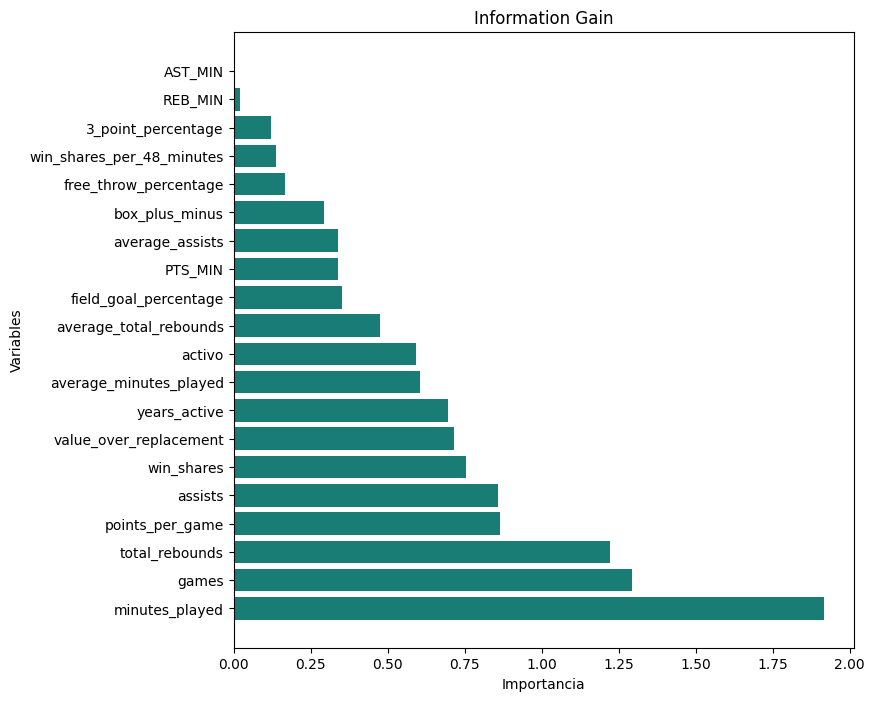

In [145]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X = datos[['years_active', 'games', 'minutes_played', 'total_rebounds',
           'assists', 'field_goal_percentage', '3_point_percentage',
           'free_throw_percentage', 'average_minutes_played', 'points_per_game',
           'average_total_rebounds', 'average_assists', 'win_shares',
           'win_shares_per_48_minutes', 'box_plus_minus', 'value_over_replacement',
           'activo', 'PTS_MIN', 'REB_MIN', 'AST_MIN']]

y = datos['points']

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Estandarizar las variables de entrada
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_imputed)

# Calcula la información mutua
mutual_info = mutual_info_classif(X_standardized, y)

# Crea un DataFrame para visualización
ig_df = pd.DataFrame({'attributes': X.columns, 'importance': mutual_info})
ig_df.sort_values(by='importance', ascending=False, inplace=True)

# Visualización con matplotlib
plt.figure(figsize=(8, 8))
plt.barh(ig_df['attributes'], ig_df['importance'], color='#197D75')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Information Gain')
plt.show()

Quitemos del analisis PTS_MIN y points_per_game, ya que ambos son formulas matematicas y de conocer los puntos y partidos jugados se pueden sacar solas. Es evidente que haya informacion mutua en estas variables. Hagamos de nuevo el analisis:

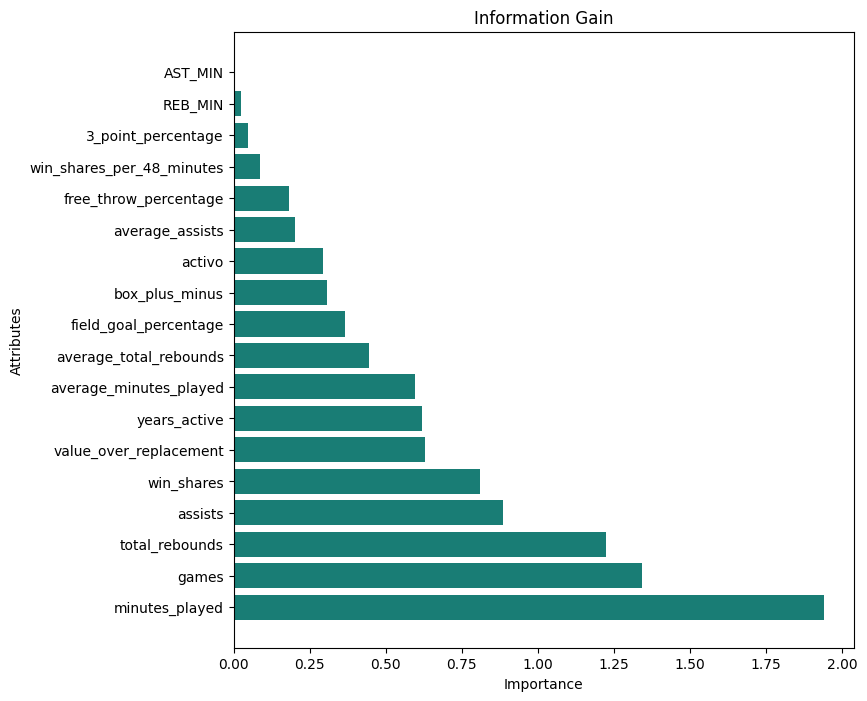

In [126]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X = datos[['years_active', 'games', 'minutes_played', 'total_rebounds',
           'assists', 'field_goal_percentage', '3_point_percentage',
           'free_throw_percentage', 'average_minutes_played',
           'average_total_rebounds', 'average_assists', 'win_shares',
           'win_shares_per_48_minutes', 'box_plus_minus', 'value_over_replacement',
           'activo', 'REB_MIN', 'AST_MIN']]

y = datos['points']

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Estandarizar las variables de entrada
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_imputed)

# Calcula la información mutua
mutual_info = mutual_info_classif(X_standardized, y)

# Crea un DataFrame para visualización
ig_df = pd.DataFrame({'attributes': X.columns, 'importance': mutual_info})
ig_df.sort_values(by='importance', ascending=False, inplace=True)

# Visualización con matplotlib
plt.figure(figsize=(8, 8))
plt.barh(ig_df['attributes'], ig_df['importance'], color='#197D75')
plt.xlabel('Importance')
plt.ylabel('Attributes')
plt.title('Information Gain')
plt.show()

Del analisis de Informacion mutua vamos a postular minutes_played, games, total_rebounds, assists, win_shares y years_active.

#### <font color='#197D75'> Analisis de correlaciones</font>

                           Correlation with Class2
points                                    1.000000
minutes_played                            0.957469
win_shares                                0.934681
games                                     0.883716
value_over_replacement                    0.873664
years_active                              0.841529
assists                                   0.837952
total_rebounds                            0.819166
average_minutes_played                    0.697835
box_plus_minus                            0.541529
average_assists                           0.538425
average_total_rebounds                    0.475847
win_shares_per_48_minutes                 0.435223
AST_MIN                                   0.293903
free_throw_percentage                     0.259116
3_point_percentage                        0.165318
field_goal_percentage                     0.148283
activo                                   -0.011078
REB_MIN                        

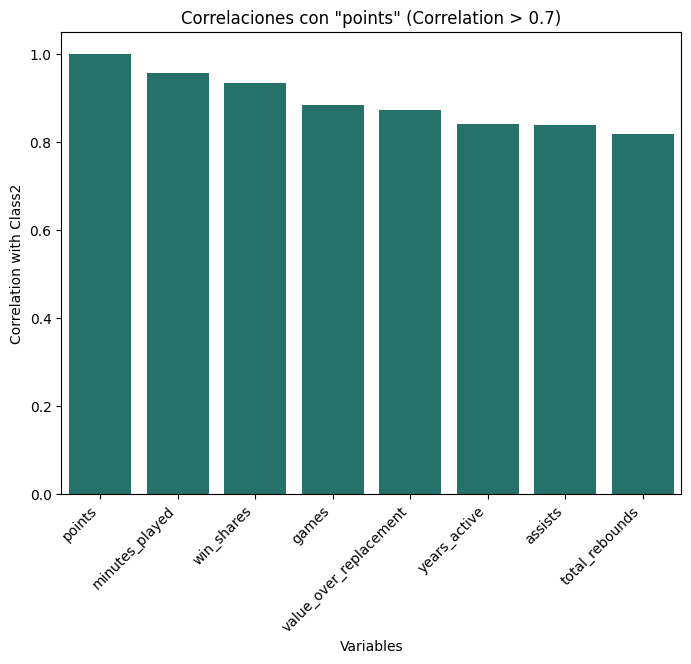

In [146]:
X = datos[['years_active', 'games', 'minutes_played', 'total_rebounds',
           'assists', 'field_goal_percentage', '3_point_percentage',
           'free_throw_percentage', 'average_minutes_played',
           'average_total_rebounds', 'average_assists', 'win_shares',
           'win_shares_per_48_minutes', 'box_plus_minus', 'value_over_replacement',
           'activo', 'REB_MIN', 'AST_MIN', 'points']]

# Calcular la matriz de correlación
correlation_matrix = X.corr(method='pearson')  # Puedes cambiar el método según tus necesidades

# Extraer la columna de correlaciones con la variable "Class2"
correlation_with_class2 = correlation_matrix['points']

# Crear un DataFrame para mostrar los resultados y ordenarlo por valor de correlación
correlation_table = pd.DataFrame({'Correlation with Class2': correlation_with_class2})
correlation_table = correlation_table.sort_values(by='Correlation with Class2', ascending=False)

# Imprimir o ver la tabla de correlación
print(correlation_table)

# Definir el umbral de correlación
umbral_correlacion = 0.7

# Filtrar características con correlación mayor al umbral
features_seleccionadas = correlation_table[correlation_table['Correlation with Class2'] > umbral_correlacion].index

# Filtrar el DataFrame original
X_seleccionado = X[features_seleccionadas]

# Calcular la matriz de correlación para las características seleccionadas
correlation_matrix_seleccionado = X_seleccionado.corr(method='pearson')

# Crear un gráfico de barras ordenado
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_matrix_seleccionado.index, y=correlation_matrix_seleccionado['points'], color='#197D75')
plt.xlabel('Variables')
plt.ylabel('Correlation with Class2')
plt.title('Correlaciones con "points" (Correlation > 0.7)')
plt.xticks(rotation=45, ha='right')
plt.show()

Del analisis de correlaciones postulamos como posibles candidatas de variables independientes a las 8 variables que poseen una correlacion lineal mayor estricta a 0,7. Estas son: points, minutes_played, win_shares, games, value_over_replacement, years_active, assists, total_rebounds.

#### <font color='#197D75'> Analisis de componentes con PCA </font>

In [128]:
from sklearn.decomposition import PCA

subset = datos.dropna()
X = subset[['years_active', 'games', 'minutes_played', 'total_rebounds',
           'assists', 'field_goal_percentage', '3_point_percentage',
           'free_throw_percentage', 'average_minutes_played',
           'average_total_rebounds', 'average_assists', 'win_shares',
           'win_shares_per_48_minutes', 'box_plus_minus', 'value_over_replacement',
           'activo', 'REB_MIN', 'AST_MIN', 'points']]

# Estandarizar los datos
scaler = StandardScaler()
sub_set_standardized = scaler.fit_transform(X)

# Inicializar el modelo PCA
pca = PCA()

# Aplicar PCA a los datos estandarizados
principal_components = pca.fit_transform(sub_set_standardized)

# Obtener la desviación estándar y varianza de la primera componente principal
std_dev_component1 = principal_components[:, 0].std()
var_component1 = principal_components[:, 0].var()

# Resumen del análisis de componentes principales
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)
print("\nDesviación estándar de la primera componente principal:", std_dev_component1)
print("Varianza de la primera componente principal:", var_component1)

Varianza explicada por cada componente principal:
[4.81602476e-01 1.74282983e-01 9.61779326e-02 6.21944704e-02
 4.72686341e-02 3.66271440e-02 2.94821110e-02 2.72364316e-02
 1.54382420e-02 9.97586961e-03 7.86534562e-03 3.11519366e-03
 2.66863528e-03 2.25604555e-03 1.36530173e-03 1.11813780e-03
 6.20786481e-04 4.16485269e-04 2.87774745e-04]

Desviación estándar de la primera componente principal: 3.024970584940416
Varianza de la primera componente principal: 9.150447039754761


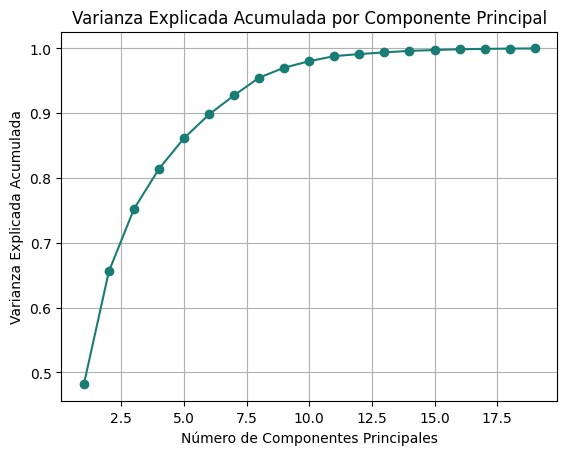

In [129]:
varianzas_componentes = np.array((pca.explained_variance_ratio_))
# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(varianzas_componentes)

# Visualizar la varianza explicada acumulada
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', color='#197D75')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.grid(True)
plt.show()

Seleccionamos hasta el 8vo componente para visualizar nuestras variables. Veamos las cargas de cada una de ellas:

In [130]:
cargas = pca.components_[:8, :]

# Obtenemos el nombre de las variables
variables = X.columns

# Creamos un df para mostrar los resultados
loadings_df = pd.DataFrame(cargas.T, columns=[f'PC{i+1}' for i in range(cargas.shape[0])])
loadings_df['Variable'] = variables

# Redondeamos los loadings a 3 decimales para hacerlo mas visual
loadings_df = loadings_df.round(3)

# Establecemops la variable como indice
loadings_df.set_index('Variable', inplace=True)
print(loadings_df)

                             PC1    PC2    PC3    PC4    PC5    PC6    PC7  \
Variable                                                                     
years_active               0.280  0.003  0.299 -0.095 -0.064  0.026 -0.131   
games                      0.293 -0.008  0.265 -0.099 -0.019  0.006 -0.132   
minutes_played             0.311 -0.041  0.208 -0.044  0.071  0.028 -0.081   
total_rebounds             0.285  0.173  0.163 -0.001  0.194 -0.122 -0.010   
assists                    0.278 -0.195  0.034  0.233 -0.032  0.191  0.030   
field_goal_percentage      0.116  0.372 -0.281 -0.071 -0.352  0.181 -0.130   
3_point_percentage         0.040 -0.304 -0.138 -0.540  0.003  0.138 -0.473   
free_throw_percentage      0.079 -0.309 -0.081 -0.431 -0.124 -0.414  0.657   
average_minutes_played     0.257 -0.095 -0.206 -0.083  0.171 -0.418 -0.292   
average_total_rebounds     0.205  0.309 -0.187  0.024  0.245 -0.455 -0.100   
average_assists            0.201 -0.292 -0.296  0.358 -0.029 -0.

La gran mayoria de las variables aportan una carga relativamente simetrica a nuestras varianzas. Limpiemos nuestos datos con las evaluaciones de informacion mutua y correlaciones. Para ello establecemos una posible seleccion de variables: minutes_played, games, total_rebounds, assists, win_shares, years_active y value_over_replacement.

In [131]:
from sklearn.decomposition import PCA

subset = datos.dropna()
X = subset[['minutes_played', 'games', 'minutes_played', 'total_rebounds',
           'assists', 'win_shares', 'years_active',
           'value_over_replacement']]

# Estandarizar los datos
scaler = StandardScaler()
sub_set_standardized = scaler.fit_transform(X)

# Inicializar el modelo PCA
pca = PCA()

# Aplicar PCA a los datos estandarizados
principal_components = pca.fit_transform(sub_set_standardized)

# Obtener la desviación estándar y varianza de la primera componente principal
std_dev_component1 = principal_components[:, 0].std()
var_component1 = principal_components[:, 0].var()

# Resumen del análisis de componentes principales
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)
print("\nDesviación estándar de la primera componente principal:", std_dev_component1)
print("Varianza de la primera componente principal:", var_component1)

Varianza explicada por cada componente principal:
[8.55109817e-01 7.39402329e-02 4.92878724e-02 1.17458895e-02
 6.60673896e-03 2.08733898e-03 1.22211024e-03 1.36262181e-32]

Desviación estándar de la primera componente principal: 2.6155073191517966
Varianza de la primera componente principal: 6.840878536536617


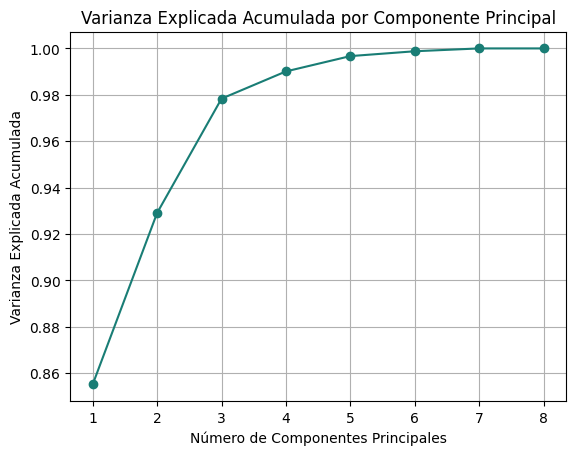

In [132]:
varianzas_componentes = np.array((pca.explained_variance_ratio_))
# Calcular la varianza acumulada
varianza_acumulada = np.cumsum(varianzas_componentes)

# Visualizar la varianza explicada acumulada
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', color='#197D75')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.grid(True)
plt.show()

Nos quedaremos con los primeros tres componentes. Pasemos a analizar que variables aportan mas a la varianza:

In [133]:
cargas = pca.components_[:3, :]

# Obtenemos el nombre de las variables
variables = X.columns

# Creamos un df para mostrar los resultados
loadings_df = pd.DataFrame(cargas.T, columns=[f'PC{i+1}' for i in range(cargas.shape[0])])
loadings_df['Variable'] = variables

# Redondeamos los loadings a 3 decimales para hacerlo mas visual
loadings_df = loadings_df.round(3)

# Establecemops la variable como indice
loadings_df.set_index('Variable', inplace=True)
print(loadings_df)

                          PC1    PC2    PC3
Variable                                   
minutes_played          0.377 -0.116 -0.118
games                   0.364 -0.352 -0.176
minutes_played          0.377 -0.116 -0.118
total_rebounds          0.337 -0.216  0.630
assists                 0.322  0.469 -0.582
win_shares              0.367  0.231  0.290
years_active            0.353 -0.410 -0.203
value_over_replacement  0.328  0.601  0.282


PCA revela que las variables seleccionadas tienen una distribucion simetrica a la carga de la varianza. Con lo cual procederemos a estimar el modelo de regresion lineal utilizando las variables seleccionadas:

In [134]:
columnas_seleccionadas = ['minutes_played', 'games', 'minutes_played', 'total_rebounds',
           'assists', 'win_shares', 'years_active',
           'value_over_replacement', 'points']
subset2 = datos[columnas_seleccionadas]

In [135]:
# Vamos a seleccionar las variables, tanto las X como las Y con una única variable independiente
X = subset2[['minutes_played', 'games', 'minutes_played', 'total_rebounds',
           'assists', 'win_shares', 'years_active',
           'value_over_replacement']]
y = subset2['points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

# Algoritmo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicción y evaluación
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 955780.4245695781
R-squared: 0.9506088714594861


Efectivamente nuestro modelo de regresion multivariable con el analisis de informacion mutua, correlaciones y PCA es el modelo que mejor ajusta para estimar los puntos anotados por un jugador. Veamos que sucede utilizando un arbol de decision para realizar la regresion:

## <font color='#197D75'> Arbol de decision </font>

Tiempo de ejecución del Arbol: 0.0013000965118408203 segundos


C:\Users\Mateo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\Mateo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


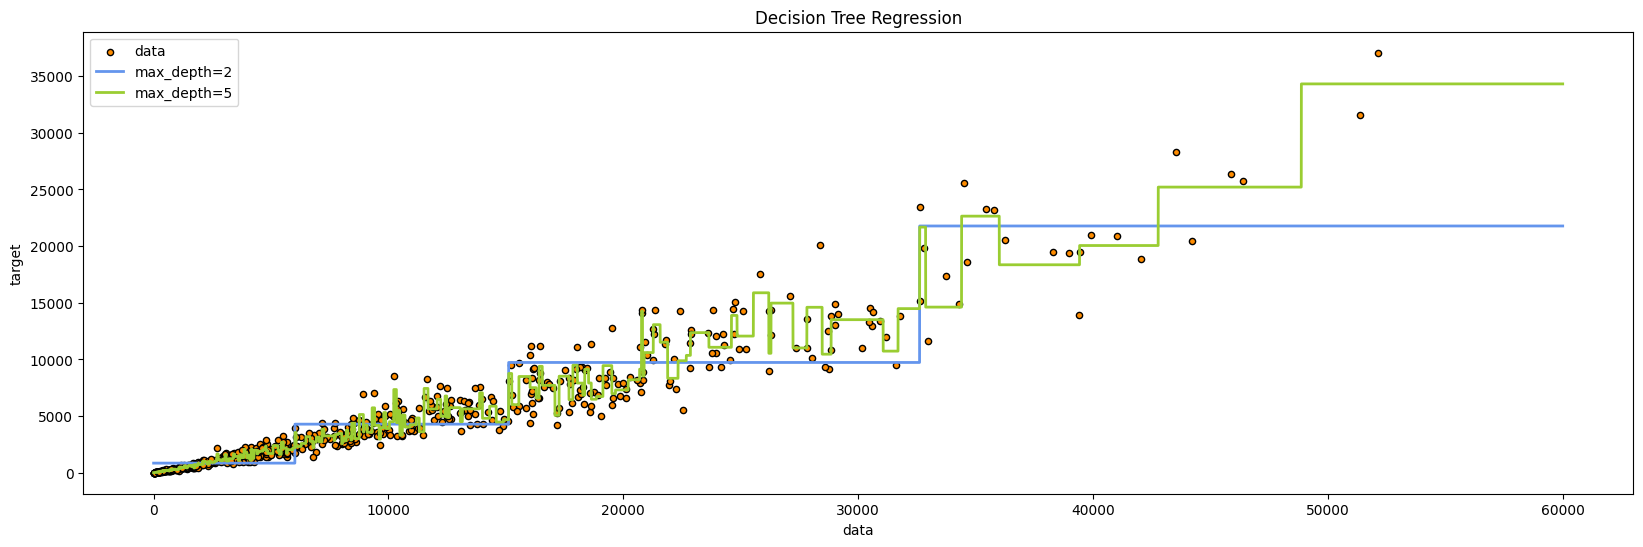

In [136]:
from sklearn.tree import DecisionTreeRegressor


X = subset3[['minutes_played']]
y = subset3['points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

time_1 = time.time()
regr_1 = DecisionTreeRegressor(max_depth=2, min_samples_split=5, min_samples_leaf=2)
regr_2 = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2)
regr_1.fit(X, y)
regr_2.fit(X, y)
time_2 = time.time()
total_time = time_2 - time_1
print(f'Tiempo de ejecución del Arbol: {total_time} segundos')

X_test = np.arange(1, 60000).reshape(-1, 1)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure(figsize = (20, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Hemos agregado min_samples_split, que es el numero mínimo de muestras requeridas para dividir un nodo interno, y el min_samples_leaf que es el numero mínimo de muestras requeridas en un nodo hoja. Claramente, el modelo de regresion utilizado mediante el arbol de decision es muy dificil de implementar y se corre un riesgo muy alto de sobre entrenamiento. Realmente no ha tardado mucho tiempo en procesar este modelo.

## <font color='#197D75'> Optativo </font>

En este apartado continuaremos utilizando las bases de dato seleccionada. Decidimos evaluar este camino por dos cuestiones. La primera de ellas es volver a realizar el modelo de regresion logistica con las correcciones realizadas. La segunda, porque nuestra base de datos contiene un aumento de la varianza en relacion al dominio de nuestra variable de interes. Como el algoritmo de regresion logistica es especifico para clasificaciones binarias, plantearemos un caso de uso en base a la informacion que tenemos en nuestro data set. El objetivo que tenemos con este tipo de clasificacion es lograr separar en base a si el jugador ya esta establecido o no en la NBA. La categoria utilizada la construiremos a partir de alguna metrica estadistica evaluada en nuestro dominio. Haremos una regresion logistica para el indicador planteado y la variable minutos jugado. Esto nos servira para poder construir en el futuro dos modelos de regresion distintos dependiendo de que tipo de jugador estemos hablando, dado que puede existir la posibilidad de que en una parte del dominio ajuste mejor un modelo y en otra parte del dominio ajuste mejor otro. Con lo cual, a traves de los minutos jugados, determinaremos si ese jugador se encuentra consolidado o no en la NBA. Si esta consolidado, sus estadisticas seran mas estables y confiables. Veamos:

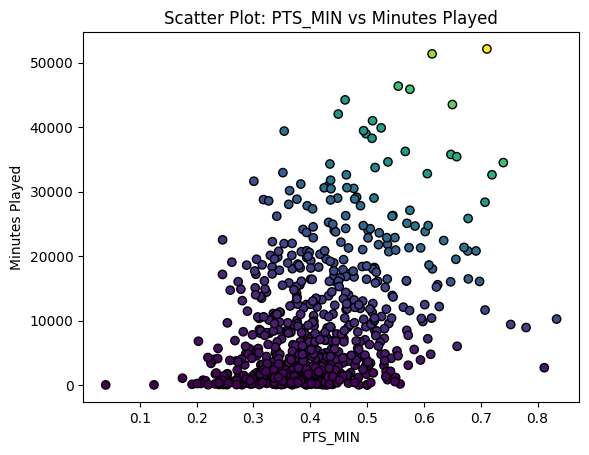

In [137]:
plt.scatter(subset['PTS_MIN'], subset['minutes_played'], c=subset['points'], cmap='viridis', edgecolors='black')
plt.xlabel('PTS_MIN')
plt.ylabel('Minutes Played')
plt.title('Scatter Plot: PTS_MIN vs Minutes Played')
plt.show()

Aun seguimos viendo que nuestra variable construida no logra separar efectivamente entre dos grupos marcados de manera vertical. Es por esta razon que buscaremos transformarla, quizas perdiendo algo de interpretacion de la misma pero con la finalidad de ajustar mejor nuestro futuro modelo.

In [138]:
datos['PTS_MIN2'] = datos['points'] * datos['points'] / datos['minutes_played']
subset6 = datos[['PTS_MIN2','points', 'total_rebounds', 'years_active', 'minutes_played', 'rank', 'player']]
subset7 = subset6.dropna(subset=['PTS_MIN2'])
subset7.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9])

,PTS_MIN2,points,total_rebounds,years_active,minutes_played,rank
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,2033.756343,4223.660767,1683.548673,6.398230,9283.995575,24.858407
std,2994.430564,5155.963971,2051.793648,4.622928,9857.327026,16.428099
min,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
10%,34.298777,98.800000,52.000000,1.000000,301.600000,4.000000
20%,122.053280,371.200000,171.400000,2.000000,1083.400000,8.400000
30%,294.480002,802.600000,373.300000,3.000000,2093.100000,13.000000
40%,502.117303,1429.400000,587.600000,4.000000,3753.000000,18.000000
50%,900.709194,2287.000000,883.500000,5.000000,5577.500000,23.000000
60%,1356.592607,3456.200000,1386.000000,7.000000,8497.400000,28.000000


Veamos que sucede si separamos nuestra variable segun el valor del ultimo decil:

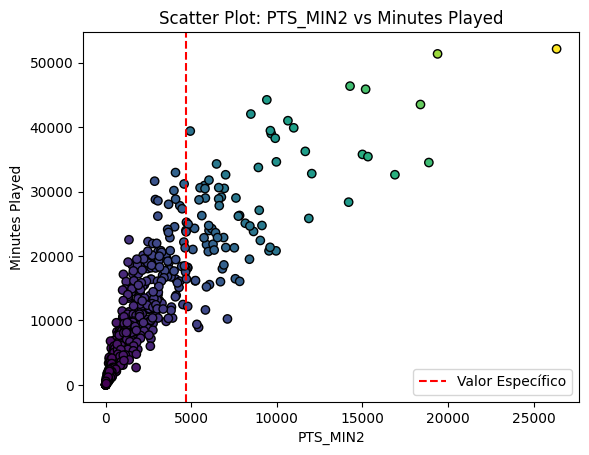

In [139]:
# Crear un scatter plot con colores basados en la variable 'points' y marcando diferencia entre el decimo percentil en PTS_MIN2
plt.scatter(subset6['PTS_MIN2'], subset6['minutes_played'], c=subset6['points'], cmap='viridis', edgecolors='black')
plt.axvline(x=4672.895367, color='red', linestyle='--', label='Valor Específico')
plt.xlabel('PTS_MIN2')
plt.ylabel('Minutes Played')
plt.title('Scatter Plot: PTS_MIN2 vs Minutes Played')
plt.legend()
plt.show()

In [140]:
subset6['Indicador'] = np.where((subset6['PTS_MIN2'] >= 4672.895367), 1, 0)
subset6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 678 entries, 501 to 1921
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PTS_MIN2        678 non-null    float64
 1   points          678 non-null    float64
 2   total_rebounds  678 non-null    float64
 3   years_active    678 non-null    float64
 4   minutes_played  678 non-null    float64
 5   rank            678 non-null    int64  
 6   player          678 non-null    object 
 7   Indicador       678 non-null    int32  
dtypes: float64(5), int32(1), int64(1), object(1)
memory usage: 45.0+ KB


C:\Users\Mateo\AppData\Local\Temp\ipykernel_21944\3865579914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset6['Indicador'] = np.where((subset6['PTS_MIN2'] >= 4672.895367), 1, 0)


In [141]:
subset7 = subset.loc[subset6['Indicador'] == 1]
subset7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 501 to 1686
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         87 non-null     int64  
 1   year                       87 non-null     int64  
 2   rank                       87 non-null     int64  
 3   overall_pick               87 non-null     int64  
 4   team                       87 non-null     object 
 5   player                     87 non-null     object 
 6   years_active               87 non-null     float64
 7   games                      87 non-null     float64
 8   minutes_played             87 non-null     float64
 9   points                     87 non-null     float64
 10  total_rebounds             87 non-null     float64
 11  assists                    87 non-null     float64
 12  field_goal_percentage      87 non-null     float64
 13  3_point_percentage         87 non-null     float64
 1

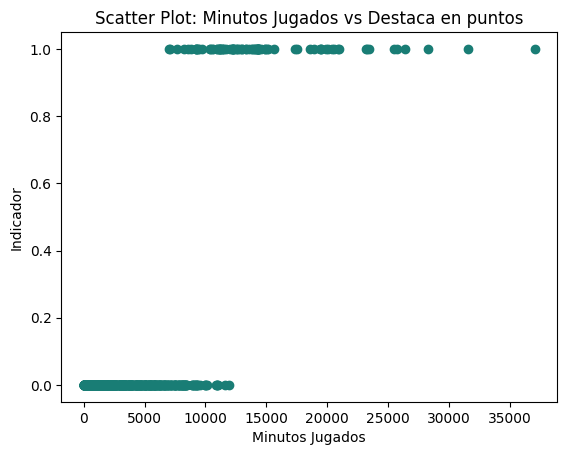

In [142]:
plt.scatter(subset6['points'], subset6['Indicador'], color='#197D75')
plt.xlabel('Minutos Jugados')
plt.ylabel('Indicador')
plt.title('Scatter Plot: Minutos Jugados vs Destaca en puntos')
plt.show()

El algoritmo mas sensillo para realizar una clasificacion binaria es la regresion logistica. Para ellos solamente necesimaos una funcion que podamos interpretar 2 estados y que un valor limite nos defina cual es el valor de transicion. Este valor de transicion es el valor limite con el cual se limita nuestra clasificacion final, cualquier valor por debajo pertenecera a la clase 0 y cualquier valor por encima pertenecera a la casle 1. Generalmente encontraremos que este valor de transicion esta ubicado en la media de las observaciones planteadas. Sin embargo, tambien podremos jugar con el mismo modificando su posicion y viendo como nos dan los resultados.

El funcionamiento de la regresion logistica es muy sensillo, se comibinan de forma lineal todas las variables como entrada del algoritmo y a la salida te da un valor entre 0 y 1, al cual lo intepretamos como una probabilidad, que en comparacion al valor de transicion, nos definira si la clasificaremos como grupo 1 o grupo 0. 

El algoritmo de RL tiene varias caracteristicas positivas buscadas por todos los algoritmos de Machine Learning:

1- Interpretabilidad
2- Separabilidad lineal
3- Eficiencia computacional
4- Resultado probabilistico
5- No asume normalidad

En nuestro planteo utilizamos una sola variable de entrada que son los minutos jugados por cada jugador, con lo cual, aqui tenemos una ganancia de presicion ya que a menos cantidad de variables mas precisa es la RL.


In [143]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

subset7 = subset6[['points', 'Indicador']]
# Load the Breast Cancer dataset
X = subset7[['points']]  # Seleccionar solo la columna 'points'
y = subset7['Indicador']

# Split the dataset into training and testing sets 20% de datos para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=33)

# Initialize and train the logistic regression model se siembra la semilla para frenar lo aleatorio
model = LogisticRegression(random_state=33)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.97

Confusion Matrix:
[[240   3]
 [  5  24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       243
           1       0.89      0.83      0.86        29

    accuracy                           0.97       272
   macro avg       0.93      0.91      0.92       272
weighted avg       0.97      0.97      0.97       272



Accuracy: 0.97

Confusion Matrix:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           1       0.85      0.85      0.85        13

    accuracy                           0.97       136
   macro avg       0.91      0.91      0.91       136
weighted avg       0.97      0.97      0.97       136



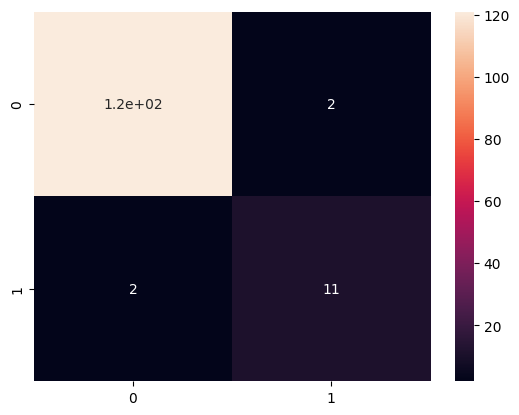

In [144]:
from sklearn.preprocessing import StandardScaler

# Scaler to avoid the error
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix, annot = True)
print("\nClassification Report:")
print(classification_rep)

Si tenemos un caso en el cual no poseemos una observacion de la cantidad de puntos que hizo el jugador en su carrera, pero si tenemos los minutos jugados, podemos plantear una estrategia de insertar datos sinteticos. Los datos sinteticos consisten en llevar a cabo ciertas estimaciones que permitan con un nivel de precision alto estimar el valor faltante en la observacion para poder completar la base de datos. Cunado hicimos las estimaciones vimos que el modelo perdia capacidad predictiva para aquellos jugadores que tenian mas minutos jugados, ya que esto se debia a ciertos desvios que podian estar generarndo en la distribucion de las variables la existencia de jugadores con pocos minutos de juego pero con algun tipo de anotacion. Esto lo comprobamos viendo como ajustaba un modelo lineal, y como ajustaba un modelo polinomial. El segundo, tenia una capacidad explicativa mucho mayor que el primero, con un menor error cuadratico. Luego hemos hecho la prueba de realizar un modelo de regresion multivariable, el cual ajusto mucho mejor que los dos anteriores, logrando una mayor capacidad explicativa y un menor error cuadratico. Por cuestiones de tiempo nos quedo por probar como hubiese ajustado el modelo multivariable en el formato polinomial, deberia mejorar mucho sus resultados. Por esta razon, concluimos que para poder tener un modelo completo que determine de manera mucho mas precisa los puntos de un jugador en base a la cantidad de minutos jugados, debemos plantear un sistemas de ecuaciones. Para la primer parte es logico utilizar nuestro modelo polinomial, pero para la segunda parte, deberiamos ajustar mas el modelo para que el mismo sea preciso. La regresion logistica que hemos disenado nos permitira evaluar que tipo de modelo debemos utilizar. Es decir, nos dira si el jugador debe ser evaluado como un jugador afianzado en la NBA con estadisticas mas confiables, o debe ser evaluado como un jugador reciente de la NBA con estadisticos mucho mas volatiles.